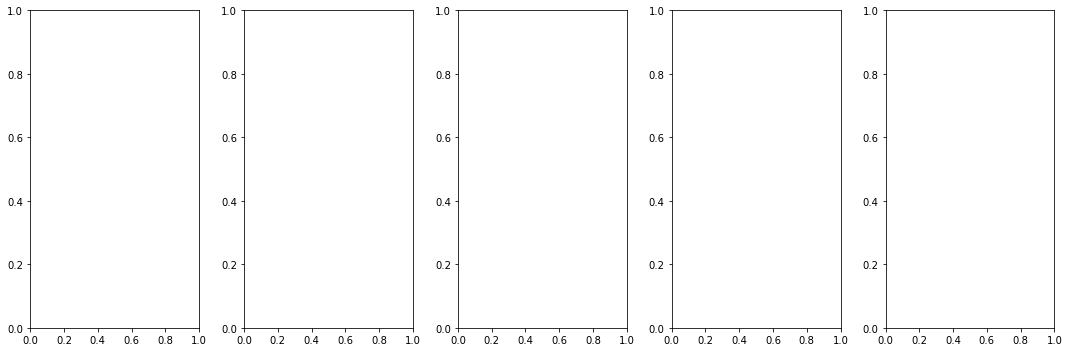

In [19]:
import matplotlib.pyplot as plt

from PIL import Image

import os
 
# List of image file paths

image_files = ["SafetyAntVelocity.png", "SafetyHalfCheetahVelocity.png", "SafetyHopperVelocity.png", "SafetySwimmerVelocity.png", "SafetyWalkerVelocity.png"]  # Replace with your filenames
image_name = ["Ant", "HalfCheetah", "Hopper", "Swimmer", "Walker"]
# Number of images

num_images = len(image_files)
 
# Create a figure with subplots in a single row

fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # (rows=1, cols=num_images)
 
# Loop through images and plot them

for i, img_path in enumerate(image_files):

    if os.path.exists(img_path):  # Ensure the file exists

        img = Image.open(img_path)  # Load image

        axes[i].imshow(img)  # Show image

        axes[i].axis("off")  # Hide axes

        axes[i].set_title(f"Image {i+1}")  # Optional title
 
# Adjust layout and display

plt.tight_layout()

plt.show()

 

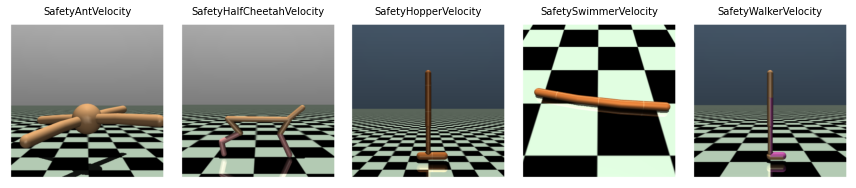

In [45]:
import matplotlib.pyplot as plt

from PIL import Image
 
# Define image file names (replace with actual file paths)
path = "images/"
# image_files = [
#     "SafetyAntVelocity.png", "SafetyHalfCheetahVelocity.png", "SafetyHopperVelocity.png", "SafetySwimmerVelocity.png", "SafetyWalkerVelocity.png"
# ]
image_files = [
    "SafetyAntVelocity.png", "SafetyHalfCheetahVelocity.png", "SafetyHopperVelocity.png", "SafetySwimmerVelocity.png", "SafetyWalkerVelocity.png"
]
# Number of rows and columns

rows = len(image_files)


 
# Create a figure with subplots

fig, axes = plt.subplots(1, rows, figsize=(12, 8))
 
# Loop through rows and columns to plot images

for i in range(rows):

    img = Image.open(path + image_files[i])  # Load image

    axes[i].imshow(img)  # Display image

    axes[i].axis("off")  # Hide axes

    axes[i].set_title(image_files[i].split(".")[0], fontsize=10)  # Add title
 
# Adjust layout for better spacing

plt.tight_layout()

plt.show()

fig.savefig("images.png", bbox_inches='tight')  # Save figure to file

 

In [12]:
import matplotlib.pyplot as plt
# from utils.utils import *
import gymnasium as gym


env = gym.make("Walker2d-v4", render_mode="rgb_array")
env.reset()
img = env.render()

plt.imshow(img)
plt.axis('off')
plt.show()

env.close()

ModuleNotFoundError: No module named 'gymnasium'

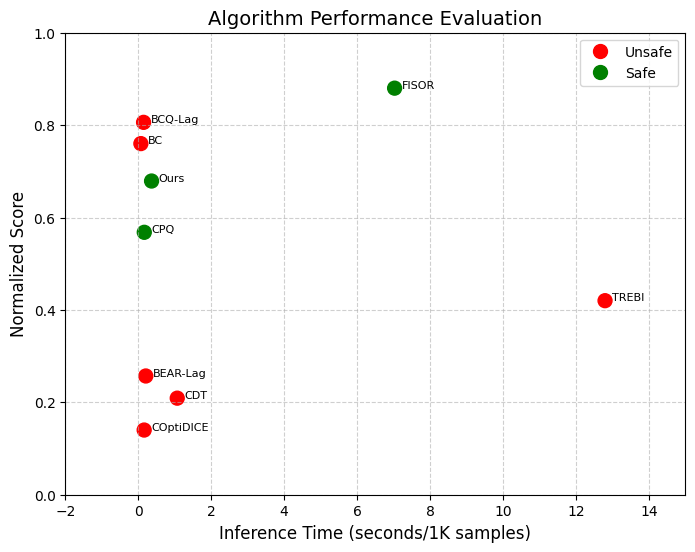

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
 
# Data (Example Values)

algorithms = ["Ours", "BC", "BCQ-Lag", "BEAR-Lag", "CDT", "CPQ", "COptiDICE", "TREBI", "FISOR"]

inference_time = [0.366, 0.0726923942565918, 0.146925210952758, 0.208, 1.07, 0.166117668151855, 0.163170576095581, 12.8, 7.03]  # x-axis: Inference Time (seconds/1K samples)

normalized_score = [0.679, 0.760, 0.806, 0.257, 0.209, 0.568, 0.140, 0.42, 0.88]  # y-axis: Normalized Score
 
# Create the scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(inference_time, normalized_score, color=['green', 'red', 'red', 'red', 'red', 'green', 'red', 'red', 'green'], s=100, marker="o")
 
# Add labels to each point

for i, algo in enumerate(algorithms):
    if algo == "COptiDICE":
        plt.text(inference_time[i]+0.2, normalized_score[i], algo, fontsize=8)
    else:
        plt.text(inference_time[i]+ 0.2, normalized_score[i], algo, fontsize=8)
 
# Label axes

plt.xlabel("Inference Time (seconds/1K samples)", fontsize=12)

plt.ylabel("Normalized Score", fontsize=12)
 
# Title

plt.title("Algorithm Performance Evaluation", fontsize=14)
 
# Grid and Layout

plt.grid(True, linestyle="--", alpha=0.6)

plt.xlim(-2, 15)  # Adjust x-axis range
# plt.xscale('log')
plt.ylim(0, 1)  # Adjust y-axis range

# Define custom legend handles (cross symbols with colors)

legend_elements = [

    Line2D([0], [0], marker='o', color='red', label='Unsafe', markersize=10, linestyle='None'),

    Line2D([0], [0], marker='o', color='green', label='Safe', markersize=10, linestyle='None')

]
 
# Add legend outside the subplots

plt.legend(handles=legend_elements, loc='upper right')
 
 
# Show the plot

# plt.show()


plt.savefig("alg_performance.pdf", bbox_inches='tight', dpi=300)  # Save figure to file
 

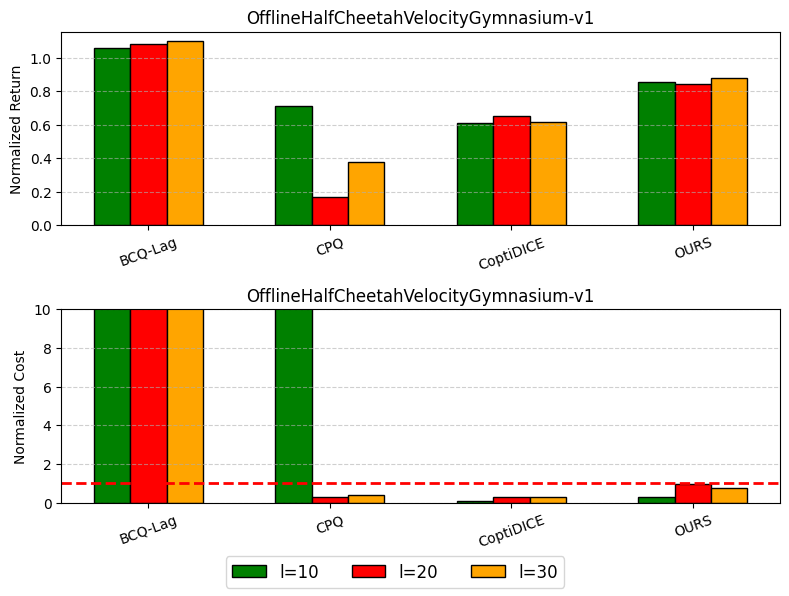

In [7]:
import numpy as np

import matplotlib.pyplot as plt
 
# Data (Example Values)

methods = ["BCQ-Lag", "CPQ", "CoptiDICE", "OURS"]

cost_limits = [10, 20, 30]  # l=10, 20, 30
 
# Example Data for Three Environments (Normalized Return and Cost)

data = {

    "OfflineHalfCheetahVelocityGymnasium-v1": {

        "Normalized Return": [[1.058, 0.713, 0.608, 0.858], 
                   [1.083, 0.165, 0.653, 0.842], 
                   [1.101, 0.376, 0.619, 0.879]],

        "Normalized Cost": [[34, 14.7, 0.1,0.3], 
                   [30.315, 0.295, 0.3, 0.975], 
                   [21.415, 0.405, 0.3, 0.731]],

    },


}
 
colors = ["green", "red", "orange"]  # Colors for l=10,20,30
 
fig, axes = plt.subplots(2, 1, figsize=(8, 6))  # 2 rows, 3 columns
 
for col, (env, metrics) in enumerate(data.items()):
    for row, metric in enumerate(["Normalized Return", "Normalized Cost"]):
        ax = axes[row]
        width = 0.2  # Width of bars
        x = np.arange(len(methods))
        ax.yaxis.grid(True, linestyle="--", alpha=0.6)

        for i, l in enumerate(cost_limits):
            ax.bar(x + i * width, metrics[metric][i], width, color=colors[i],
                   edgecolor='black', linewidth=1, label=f"l={l}" if row == 1 else "")
 
        ax.set_xticks(x + width)
        ax.set_xticklabels(methods, rotation=20)
        ax.set_title(env)
        ax.set_ylabel(metric)
        if row == 1:
            ax.set_ylim(0, 10)
            plt.axhline(y=1.0, color="red", linestyle="--", linewidth=2, label="Threshold = 1.0")
# Add legend only once at the bottom

fig.legend(["l=10", "l=20", "l=30"], loc="lower center", ncol=3, fontsize=12)
# plt.grid(axis="y")
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout
plt.savefig("cost_ablation.pdf", bbox_inches='tight', dpi=300)  # Save figure to file
plt.show()

 

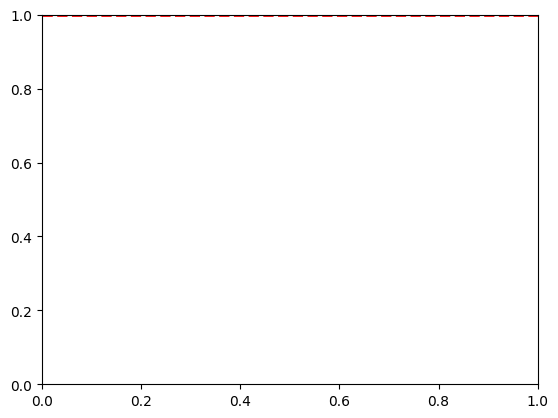

In [3]:
for col, (env, metrics) in enumerate(data.items()):
    for row, metric in enumerate(["Normalized Return", "Normalized Cost"]):
        ax = axes[row]
        width = 0.2  # Width of bars
        x = np.arange(len(methods))
 
        for i, l in enumerate(cost_limits):
            ax.bar(x + i * width, metrics[metric][i], width, color=colors[i],
                   edgecolor='black', linewidth=1, label=f"l={l}" if row == 1 else "")
 
        ax.set_xticks(x + width)
        ax.set_xticklabels(methods, rotation=20)
        ax.set_title(env)
        ax.set_ylabel(metric)
        if row == 1:
            ax.set_ylim(0, 10)
            plt.axhline(y=1.0, color="red", linestyle="--", linewidth=2, label="Threshold = 1.0")

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("beta_reward.csv")

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(df["Step"], df["OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/cost"])
# plt.plot(df["Step"], df["OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/cost__MIN"])

# Labels and legend
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


KeyError: 'OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/cost'

<Figure size 576x360 with 0 Axes>

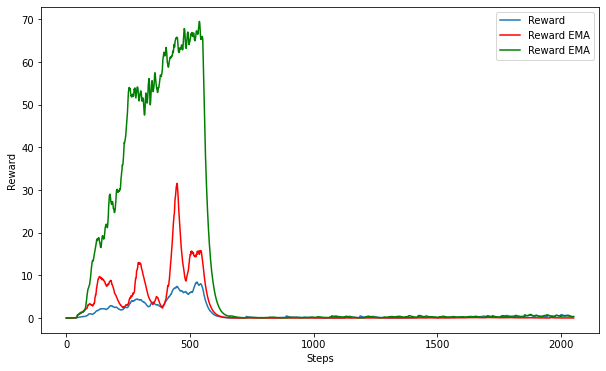

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file
df_cost1 = pd.read_csv("beta_cost_1.csv")
df_cost2 = pd.read_csv("beta_cost_2.csv")
df_cost3 = pd.read_csv("beta_cost_3.csv")

# Apply time-weighted EMA smoothing
span = 40  # Adjust span for smoothing effect
df_cost1['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/cost'] = df_cost1['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/cost'].ewm(span=span, adjust=False).mean()
df_cost2['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/cost'] = df_cost2['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/cost'].ewm(span=span, adjust=False).mean()
df_cost3['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/cost'] = df_cost3['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/cost'].ewm(span=span, adjust=False).mean()
# Convert to numpy array
data1 = df_cost1.to_numpy()
data2 = df_cost2.to_numpy()
data3 = df_cost3.to_numpy()

# Extract columns
steps = data1[:, 0]
cost1 = data1[:, 1]
cost2 = data2[:, 1]
cost3 = data3[:, 1]



# Plot reward over steps with EMA smoothing
plt.figure(figsize=(10, 6))
plt.plot(steps, cost1, label='Reward')
plt.plot(steps, cost2, label='Reward EMA', color='red')
plt.plot(steps, cost3, label='Reward EMA', color='green')
plt.xlabel('Steps')
plt.ylabel('Reward')
# plt.title('Reward over Steps with EMA Smoothing')
plt.legend()
plt.show()

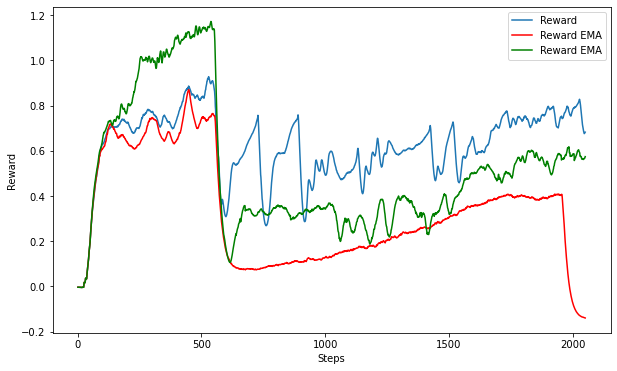

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file
df_reward1 = pd.read_csv("beta_reward_1.csv")
df_reward2 = pd.read_csv("beta_reward_2.csv")
df_reward3 = pd.read_csv("beta_reward_3.csv")

# Apply time-weighted EMA smoothing
span = 40  # Adjust span for smoothing effect
df_reward1['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/reward'] = df_reward1['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/reward'].ewm(span=span, adjust=False).mean()
df_reward2['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/reward'] = df_reward2['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/reward'].ewm(span=span, adjust=False).mean()
df_reward3['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/reward'] = df_reward3['OfflineHalfCheetahVelocityGymnasium-v1-baseline-seed100 - eval/reward'].ewm(span=span, adjust=False).mean()
# Convert to numpy array
data1 = df_reward1.to_numpy()
data2 = df_reward2.to_numpy()
data3 = df_reward3.to_numpy()

# Extract columns
steps = data1[:, 0]
reward1 = data1[:, 1]
reward2 = data2[:, 1]
reward3 = data3[:, 1]



# Plot reward over steps with EMA smoothing
plt.figure(figsize=(10, 6))
plt.plot(steps, reward1, label='Reward')
plt.plot(steps, reward2, label='Reward EMA', color='red')
plt.plot(steps, reward3, label='Reward EMA', color='green')
plt.xlabel('Steps')
plt.ylabel('Reward')
# plt.title('Reward over Steps with EMA Smoothing')
plt.legend()
plt.show()

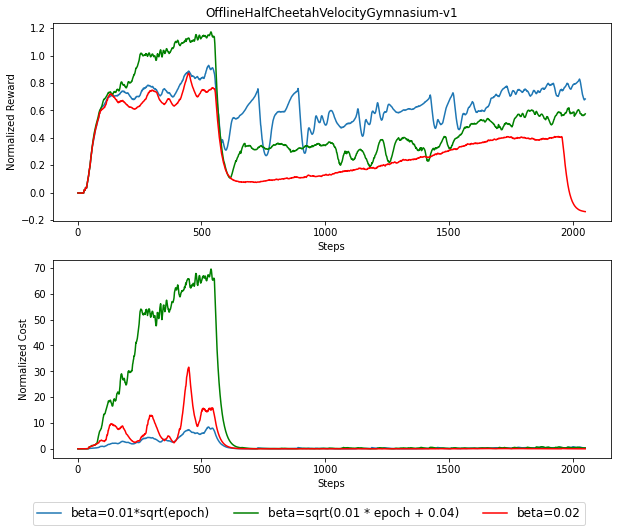

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot reward over steps with EMA smoothing for the first dataset
ax1.plot(steps, reward1, label='beta=0.01*sqrt(epoch)')
ax1.plot(steps, reward3, label='beta=sqrt(0.01 * epoch + 0.04)', color='green')
ax1.plot(steps, reward2, label='beta=0.02', color='red')

ax1.set_xlabel('Steps')
ax1.set_ylabel('Normalized Reward')
ax1.set_title('OfflineHalfCheetahVelocityGymnasium-v1')
# ax1.legend()

# Plot cost over steps with EMA smoothing for the second dataset
ax2.plot(steps, cost1, label='beta=0.01*sqrt(epoch)')
ax2.plot(steps, cost3, label='beta=sqrt(0.01 * epoch + 0.04)', color='green')
ax2.plot(steps, cost2, label='beta=0.02', color='red')

ax2.set_xlabel('Steps')
ax2.set_ylabel('Normalized Cost')
# ax2.set_title('Cost over Steps with EMA Smoothing')
# ax2.legend()
fig.legend(["beta=0.01*sqrt(epoch)", "beta=sqrt(0.01 * epoch + 0.04)", "beta=0.02"], loc="lower center", ncol=3, fontsize=12)
plt.savefig("beta_ablation.pdf", bbox_inches='tight', dpi=300)  # Save figure to file